In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
#import seaborn as sb
from sklearn.preprocessing import OneHotEncoder, StandardScaler

<h1> Load the training data </h1>

In [3]:
df = pd.read_csv('Train.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


<h1>Check the data consistency</h1>

We check the number of duplicates using the pandas <em>duplicated()</em> method. The assertion checks if the number of non-duplicates (unique) rows is equal to the total number of rows in the dataset

In [18]:
number_of_duplicates = df.duplicated().value_counts()
print(number_of_duplicates)
print(df.shape)
print(number_of_duplicates[0] == df.shape[0])
assert number_of_duplicates[0] == df.shape[0], 'There are duplicates in the dataset'


False    125973
dtype: int64
(125973, 43)
True


We check if the names of the collumns are all unique

In [23]:

unique, counts = np.unique(df.columns.duplicated(), return_counts=True)
print(unique, counts)
print(df.shape)
assert counts[0] == df.shape[1], 'There are duplicate columns in the dataset'

[False] [43]
(125973, 43)


We extract the categorical column names from the dataframe. Next we will replace their string values by their one-hot encoding 

In [22]:
categorical_columns = [df.columns[i] for i in range(len(df.columns)) if type(df[df.columns[i]][0]) == str]
print(categorical_columns)

# Remove categorical columns from the rest 
continuous_columns = df.columns.tolist()
for category in categorical_columns:
    continuous_columns.remove(category)


print(continuous_columns)


['protocol_type', 'service', 'flag', 'attack']
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag']


Then we encode the categorical columns using one-hot encoding. This encoding transforms the number of our categorical columns from 4 to 107. This relation is the sum of all of the possible categories over all categorical columns.

In [23]:
ohe = OneHotEncoder(handle_unknown='error')

features_encoded = ohe.fit_transform(df[categorical_columns]).toarray()
features_labels = np.concatenate(np.array(ohe.categories_, dtype=object))

# Add an unique suffix to the ohe labels incase they conflict with df feature labels
features_labels = [label + '_ohe' for label in features_labels]
print(features_encoded.shape)
print(features_labels)

df_encoded = pd.DataFrame(features_encoded, columns=features_labels)
df_encoded.head()

(125973, 107)
['icmp_ohe', 'tcp_ohe', 'udp_ohe', 'IRC_ohe', 'X11_ohe', 'Z39_50_ohe', 'aol_ohe', 'auth_ohe', 'bgp_ohe', 'courier_ohe', 'csnet_ns_ohe', 'ctf_ohe', 'daytime_ohe', 'discard_ohe', 'domain_ohe', 'domain_u_ohe', 'echo_ohe', 'eco_i_ohe', 'ecr_i_ohe', 'efs_ohe', 'exec_ohe', 'finger_ohe', 'ftp_ohe', 'ftp_data_ohe', 'gopher_ohe', 'harvest_ohe', 'hostnames_ohe', 'http_ohe', 'http_2784_ohe', 'http_443_ohe', 'http_8001_ohe', 'imap4_ohe', 'iso_tsap_ohe', 'klogin_ohe', 'kshell_ohe', 'ldap_ohe', 'link_ohe', 'login_ohe', 'mtp_ohe', 'name_ohe', 'netbios_dgm_ohe', 'netbios_ns_ohe', 'netbios_ssn_ohe', 'netstat_ohe', 'nnsp_ohe', 'nntp_ohe', 'ntp_u_ohe', 'other_ohe', 'pm_dump_ohe', 'pop_2_ohe', 'pop_3_ohe', 'printer_ohe', 'private_ohe', 'red_i_ohe', 'remote_job_ohe', 'rje_ohe', 'shell_ohe', 'smtp_ohe', 'sql_net_ohe', 'ssh_ohe', 'sunrpc_ohe', 'supdup_ohe', 'systat_ohe', 'telnet_ohe', 'tftp_u_ohe', 'tim_i_ohe', 'time_ohe', 'urh_i_ohe', 'urp_i_ohe', 'uucp_ohe', 'uucp_path_ohe', 'vmnet_ohe', 'who

,icmp_ohe,tcp_ohe,udp_ohe,IRC_ohe,X11_ohe,Z39_50_ohe,aol_ohe,auth_ohe,bgp_ohe,courier_ohe,...,phf_ohe,pod_ohe,portsweep_ohe,rootkit_ohe,satan_ohe,smurf_ohe,spy_ohe,teardrop_ohe,warezclient_ohe,warezmaster_ohe
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Every columns that is not categorical we assume to be a continuous variable that we scale to N(0,1) using sklearn <em>StandardScaler</em>

In [24]:
scaler = StandardScaler()
scaled_columns  = scaler.fit_transform(df[continuous_columns])
df_scaled = pd.DataFrame(scaled_columns, columns=continuous_columns)
df_scaled.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0.216426
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,-1.965556
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.219970
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0.652823
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.652823


Then we concatenate the df without categorical columns with the onehot encoded columns.

In [25]:
df_preprocessed = pd.concat([df_encoded, df_scaled], axis=1)
df_preprocessed.head()

,icmp_ohe,tcp_ohe,udp_ohe,IRC_ohe,X11_ohe,Z39_50_ohe,aol_ohe,auth_ohe,bgp_ohe,courier_ohe,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0.216426
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,-1.965556
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.219970
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0.652823
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.652823


In [26]:
df_preprocessed.dtypes

icmp_ohe                    float64
tcp_ohe                     float64
udp_ohe                     float64
IRC_ohe                     float64
X11_ohe                     float64
                             ...   
dst_host_serror_rate        float64
dst_host_srv_serror_rate    float64
dst_host_rerror_rate        float64
dst_host_srv_rerror_rate    float64
last_flag                   float64
Length: 146, dtype: object

In [27]:
df_preprocessed[continuous_columns]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0.216426
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,-1.965556
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.219970
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0.652823
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.652823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0.216426
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.652823
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,-0.656367
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0.216426


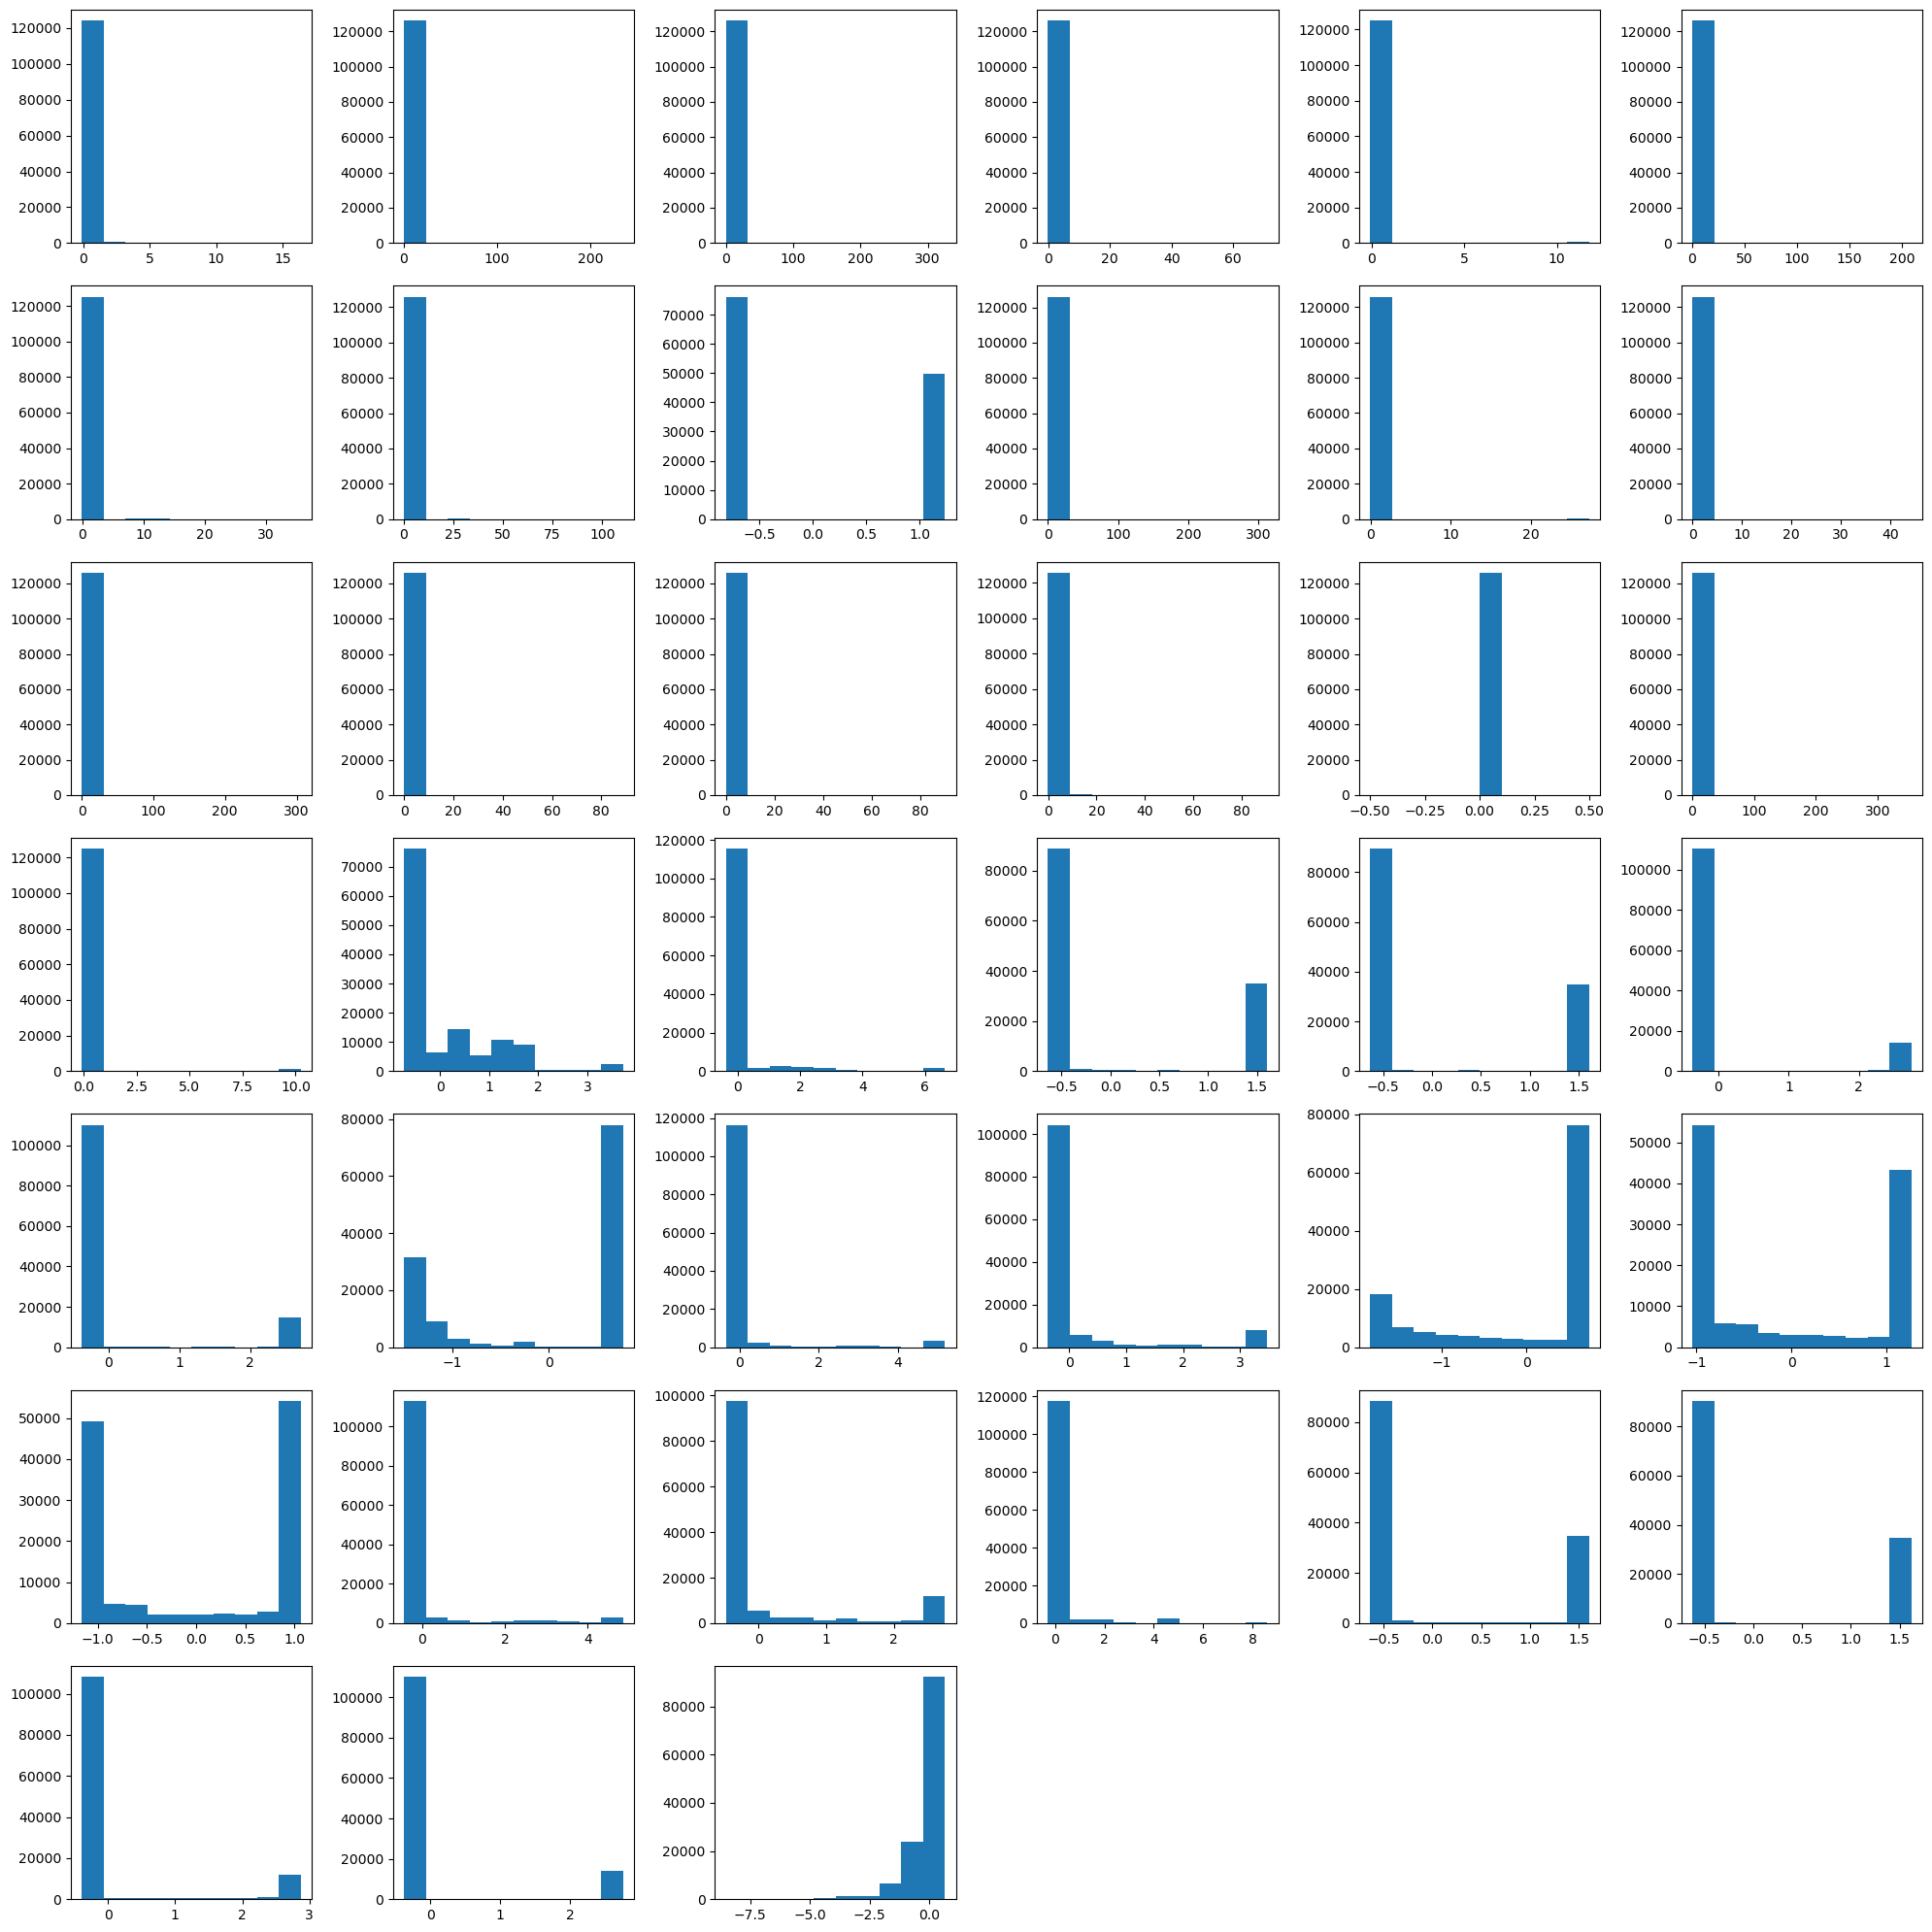

In [34]:

Tot = len(continuous_columns)
Cols = int(np.sqrt(len(continuous_columns)))

# Compute Rows required

Rows = Tot // Cols 

if Tot % Cols != 0:
    Rows += 1

# Create a Position index
Position = range(1,Tot + 1)

fig = plt.figure(figsize=(20,20))
for k in range(len(continuous_columns)):
    ax = fig.add_subplot(Rows,Cols,Position[k])
    counts, bins = np.histogram(df_preprocessed[continuous_columns[k]])
    plt.hist(bins[:-1], bins, weights=counts)

plt.tight_layout()